2024-05-12 15:19:08,129 [MainThread] [INFO]  Inicio del entrenamiento. Calculando la política óptima a partir de las recompensas...
2024-05-12 15:19:08,130 [MainThread] [INFO]  Ejecutando POLICY_ITERATION para resolver el MDP


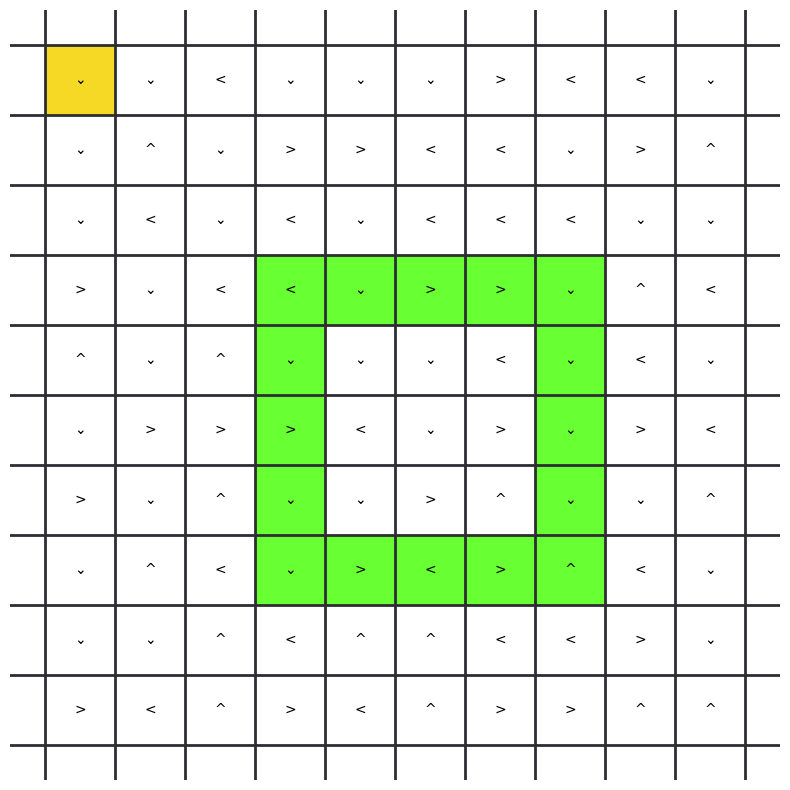

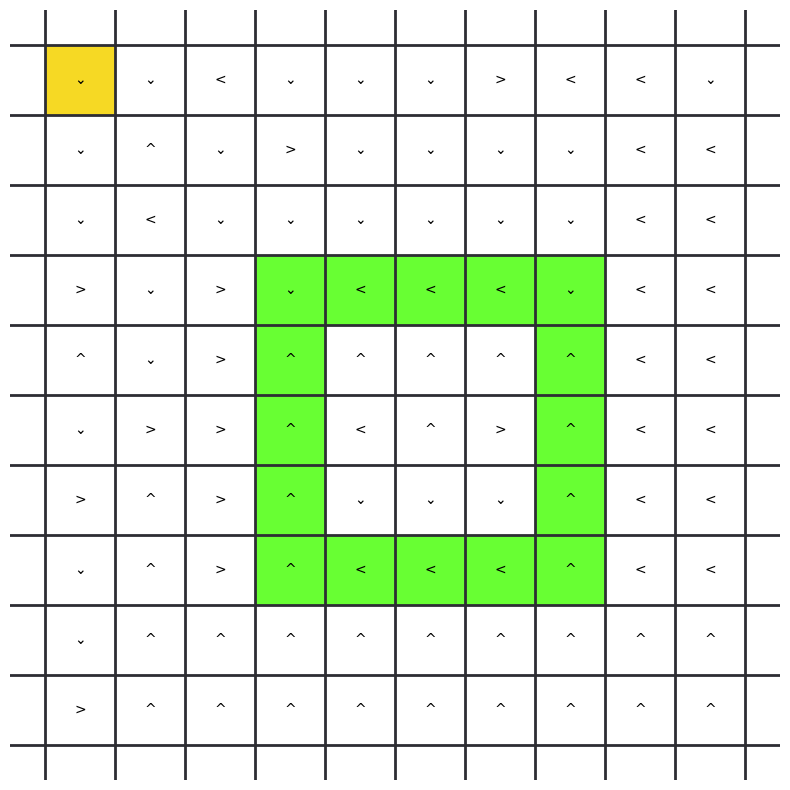

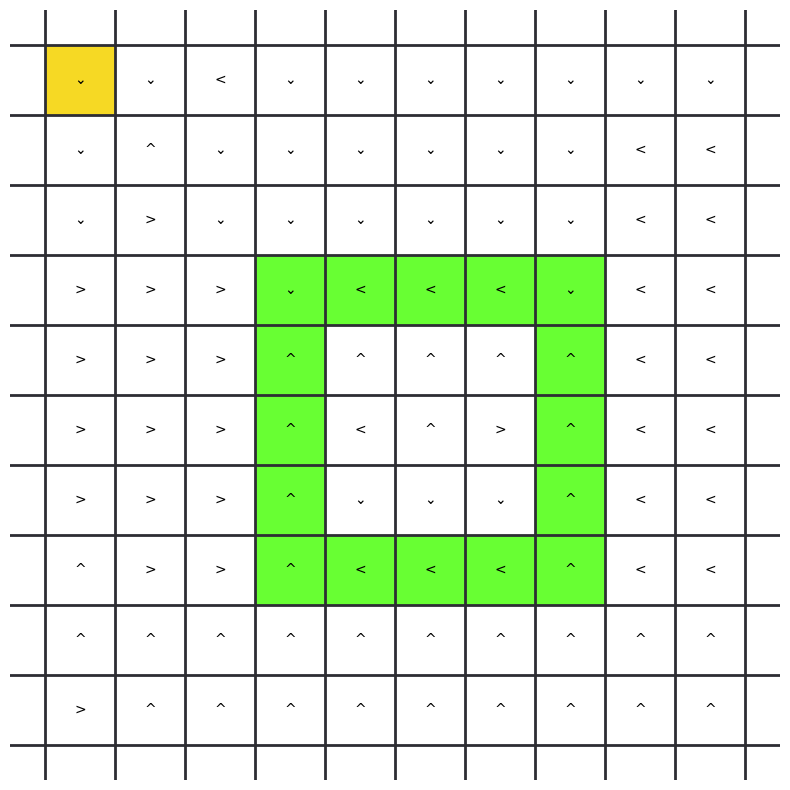

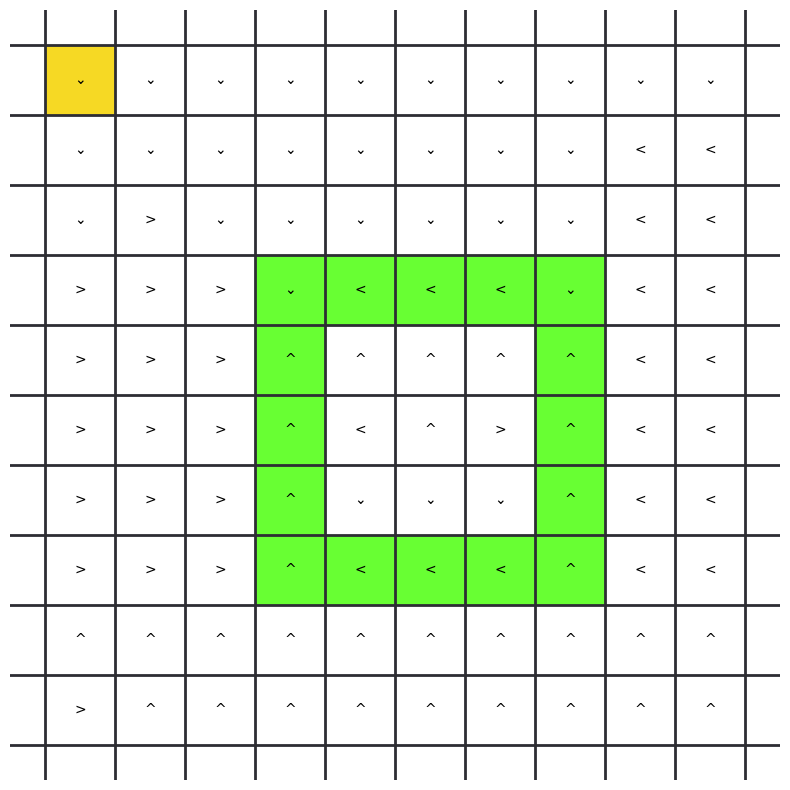

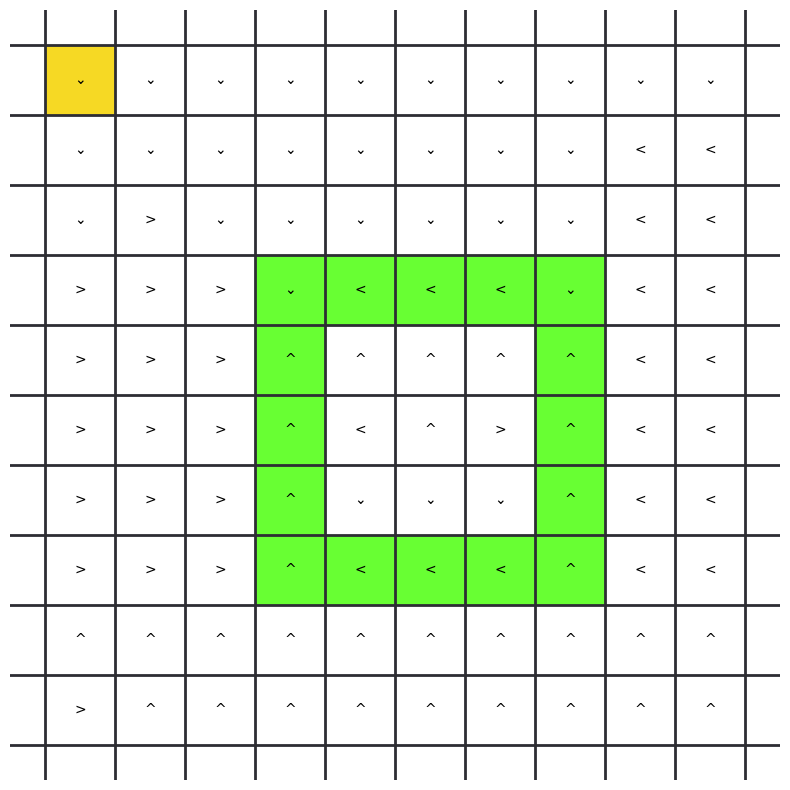

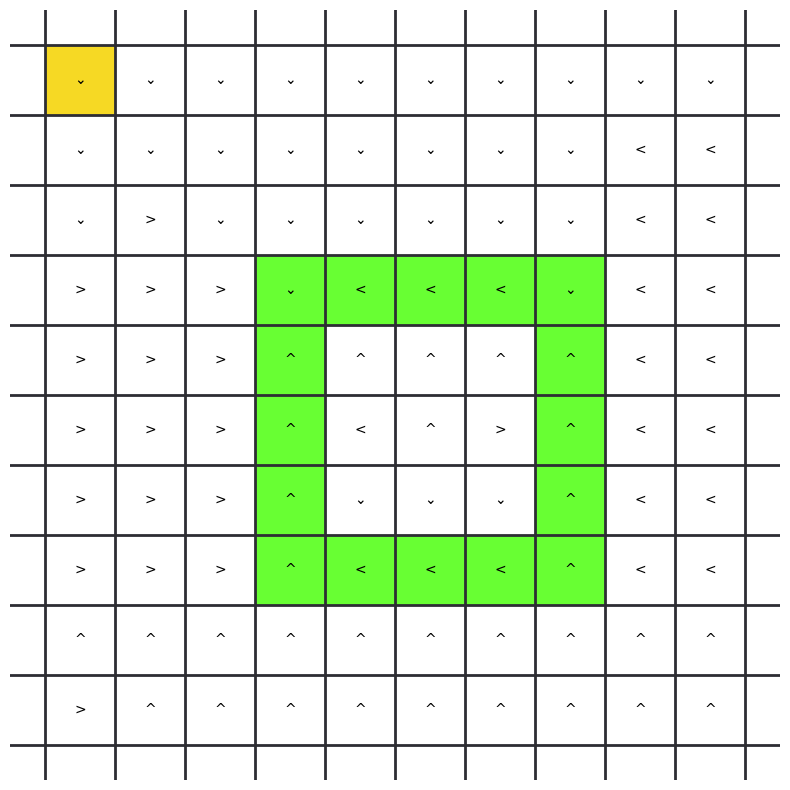

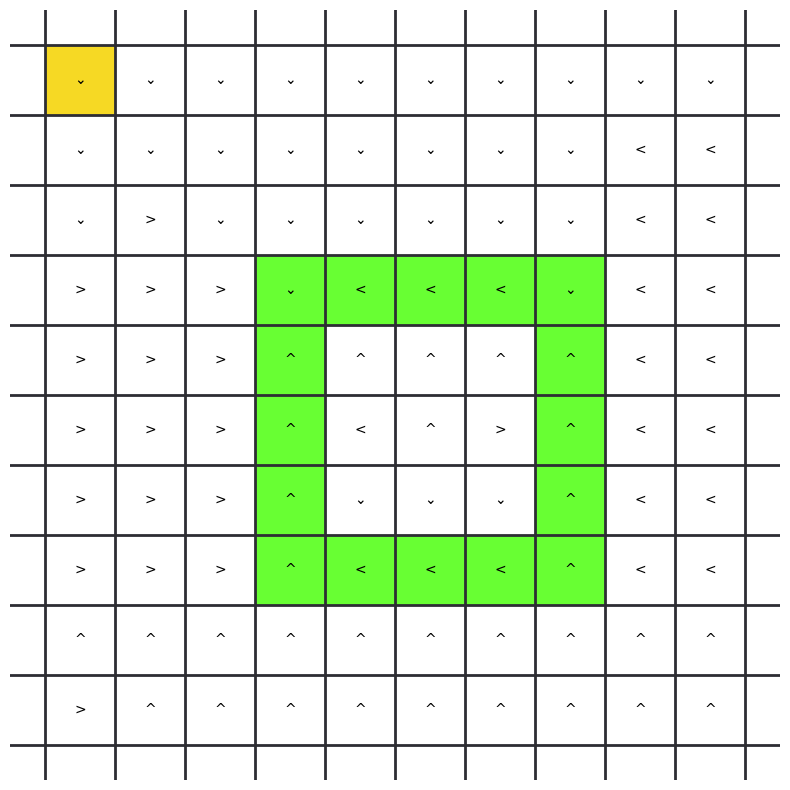

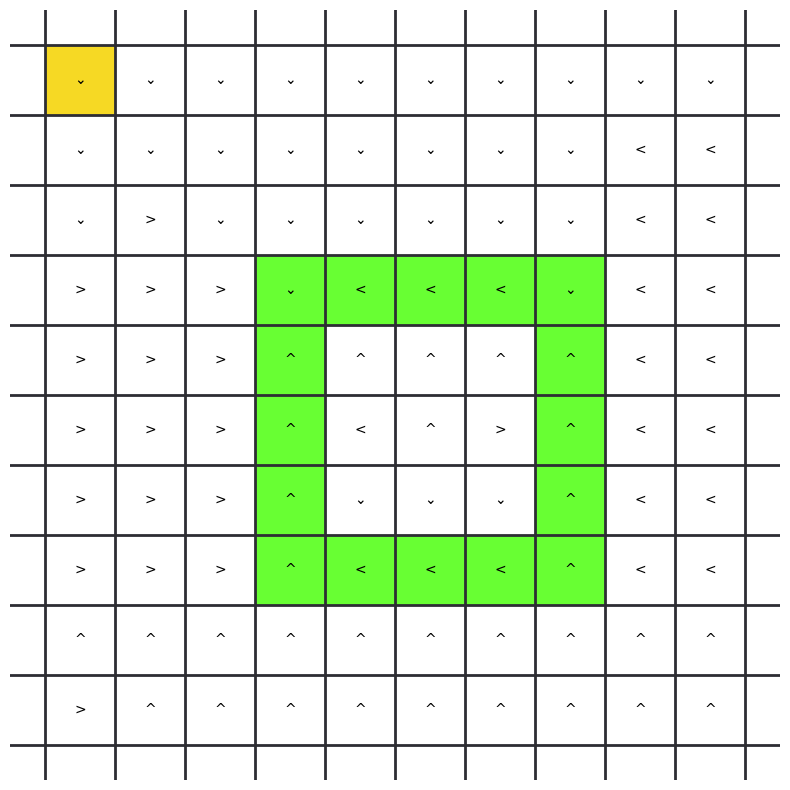

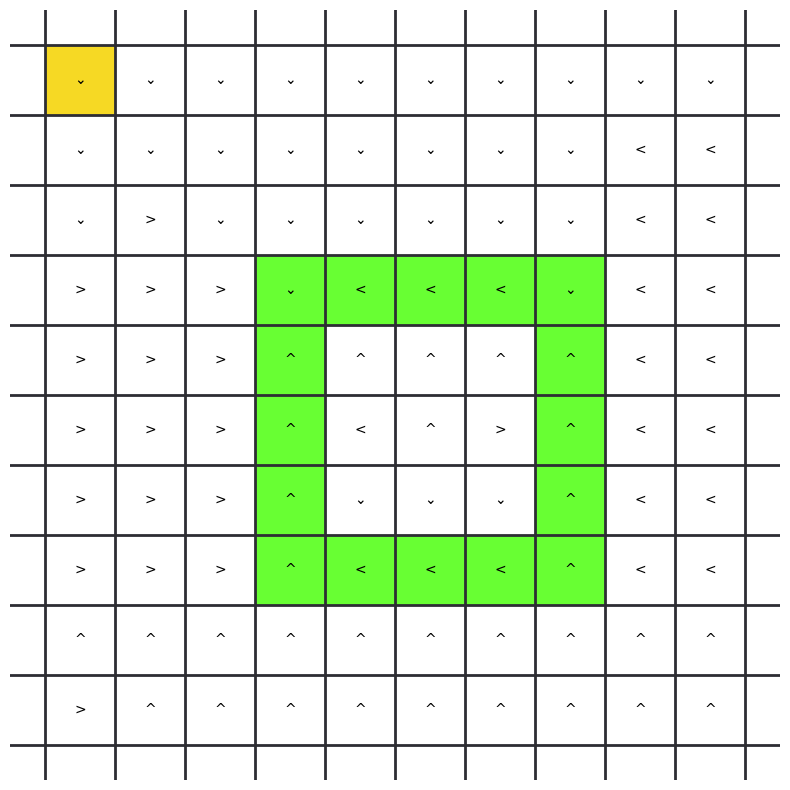

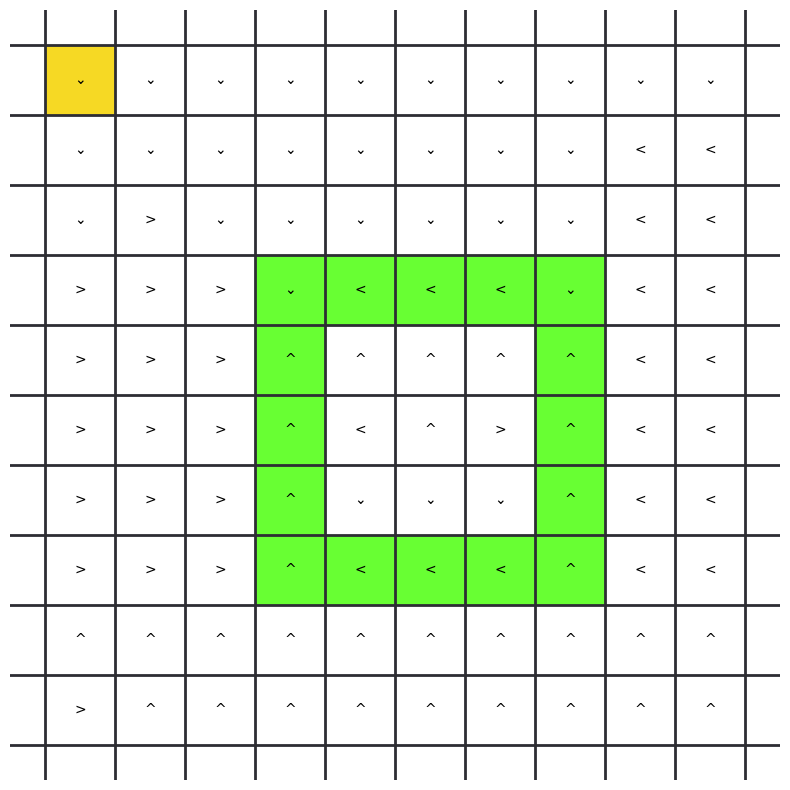

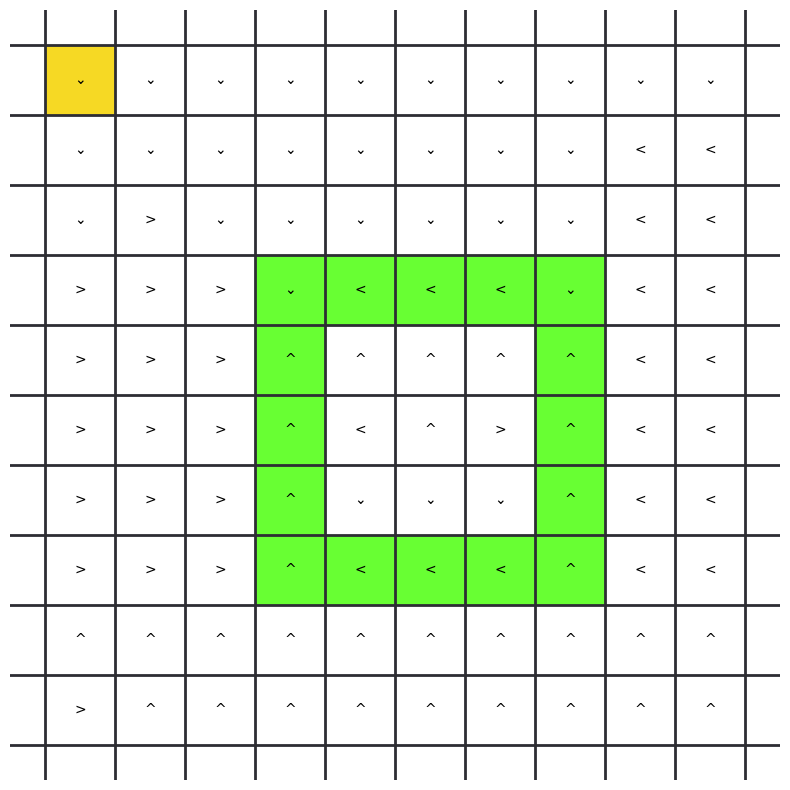

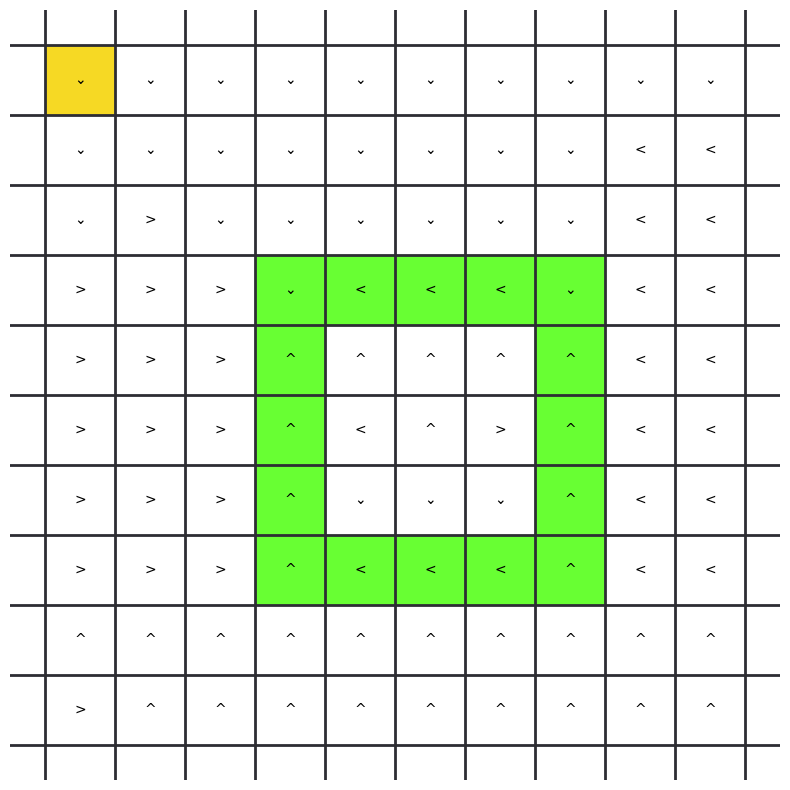

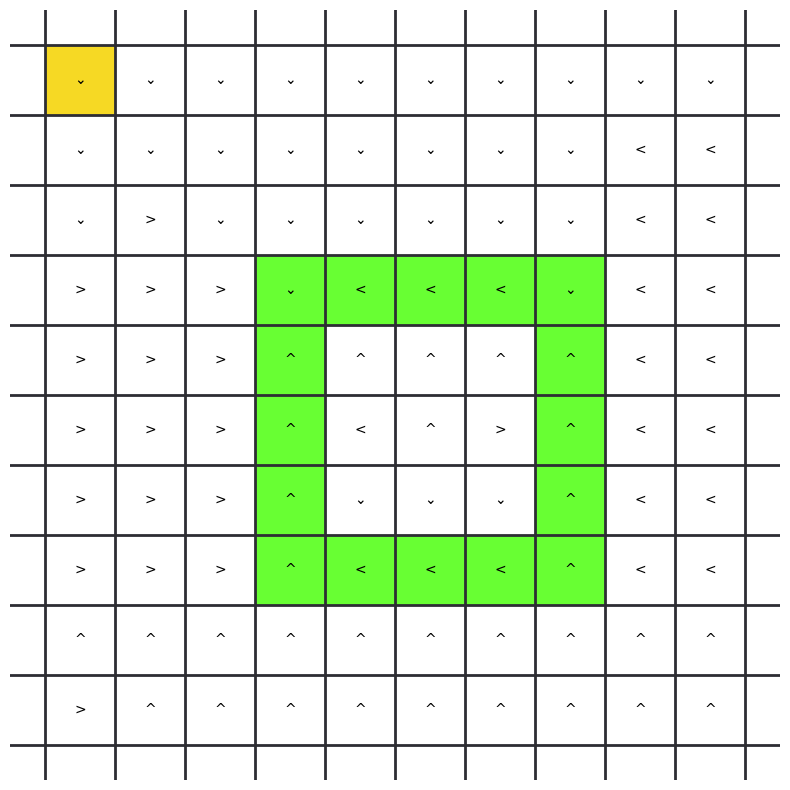

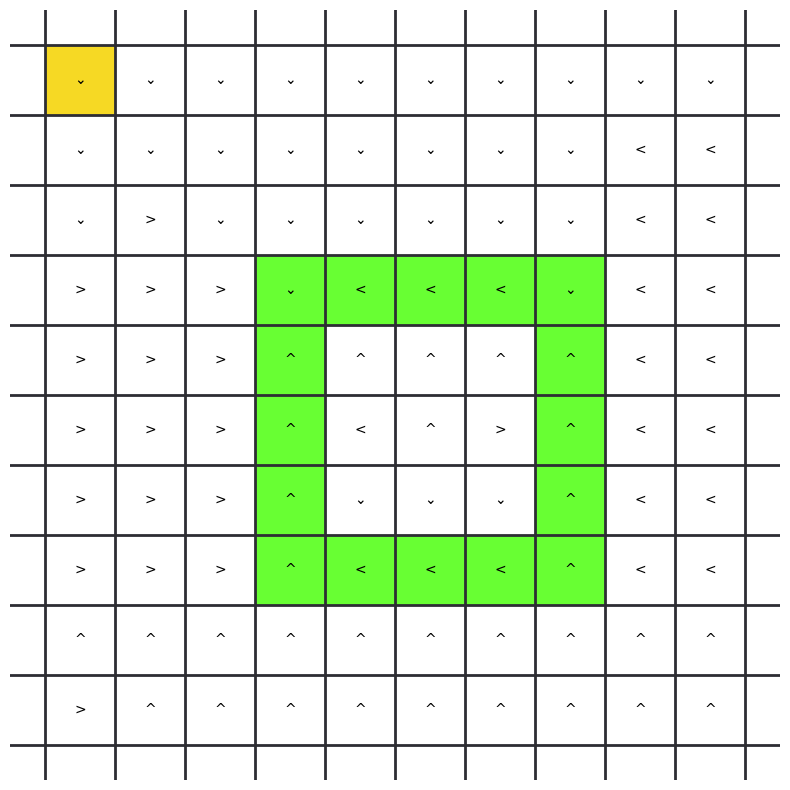

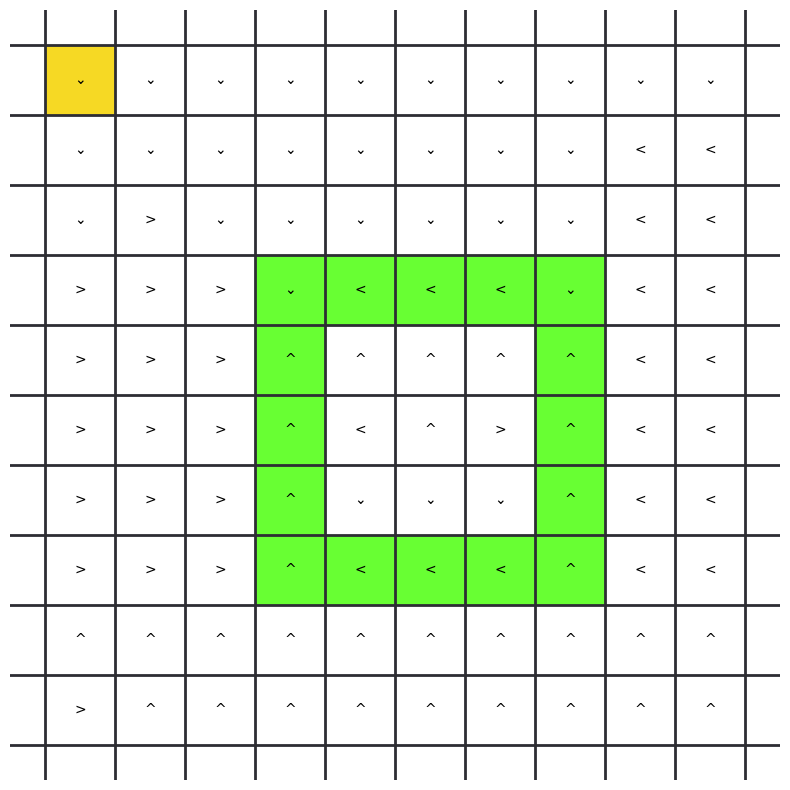

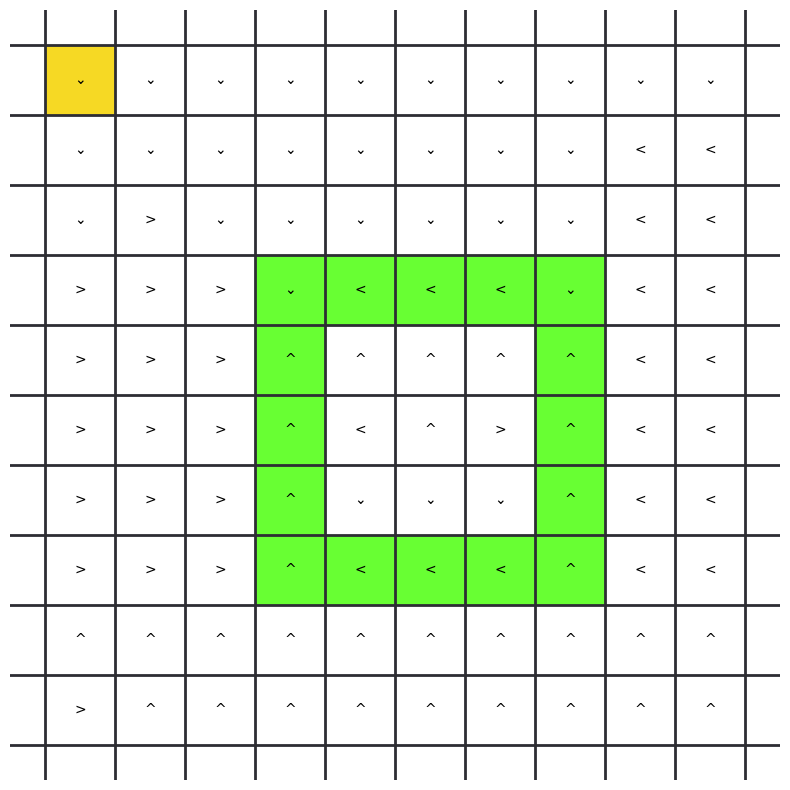

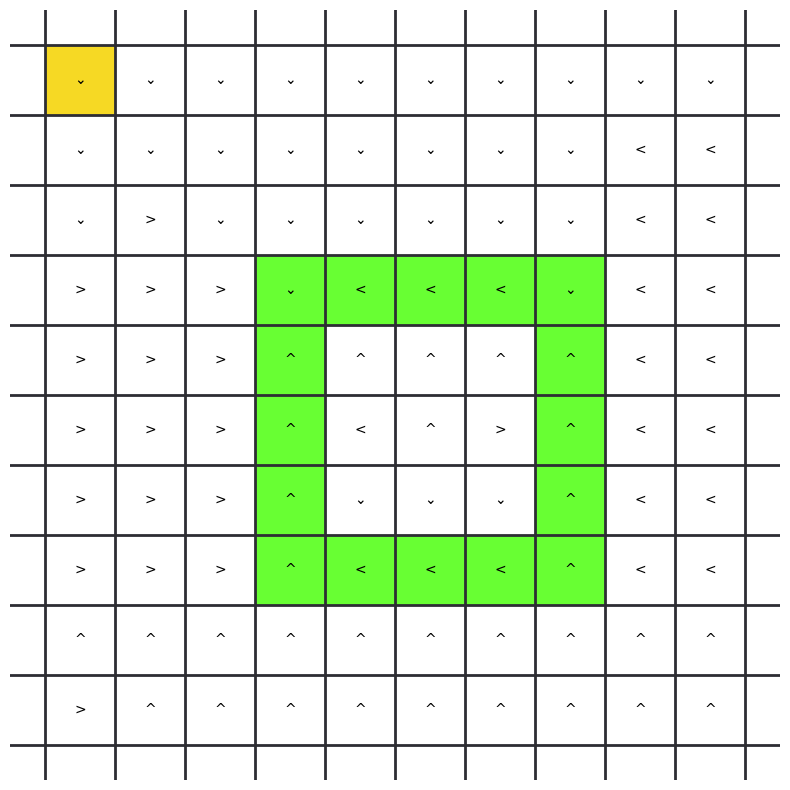

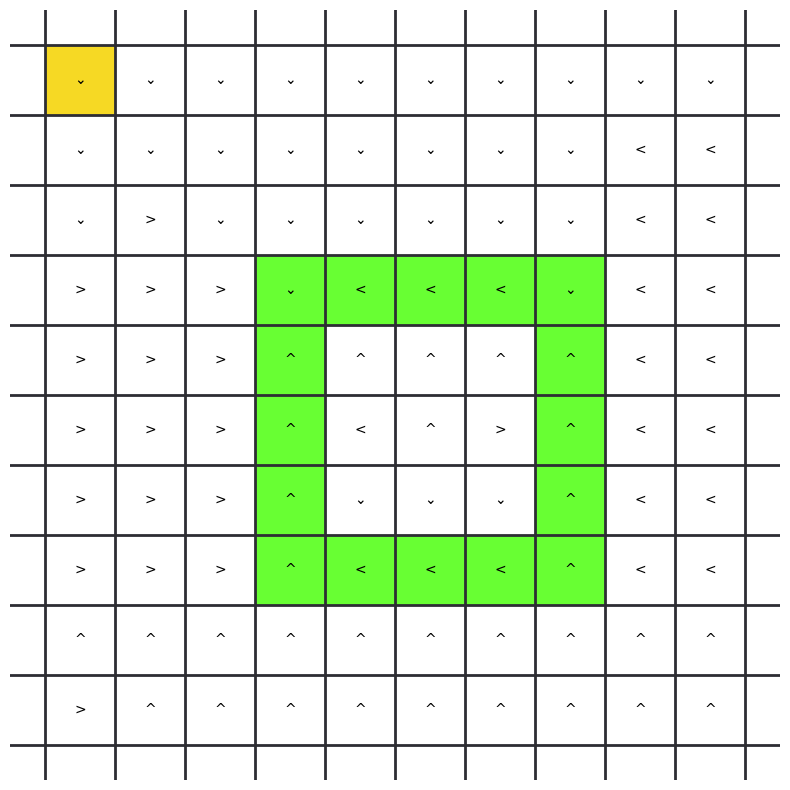

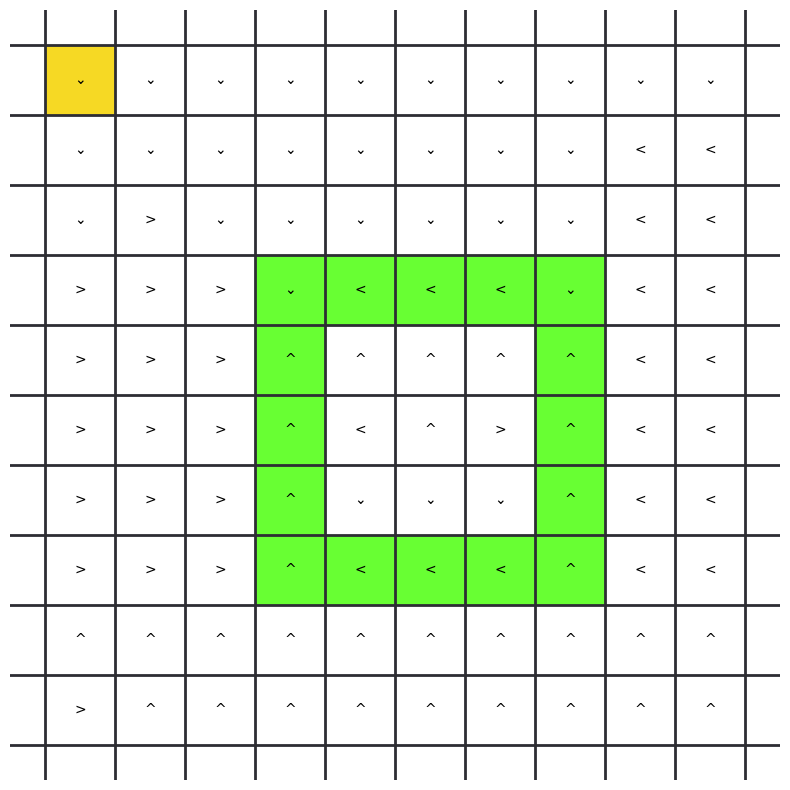

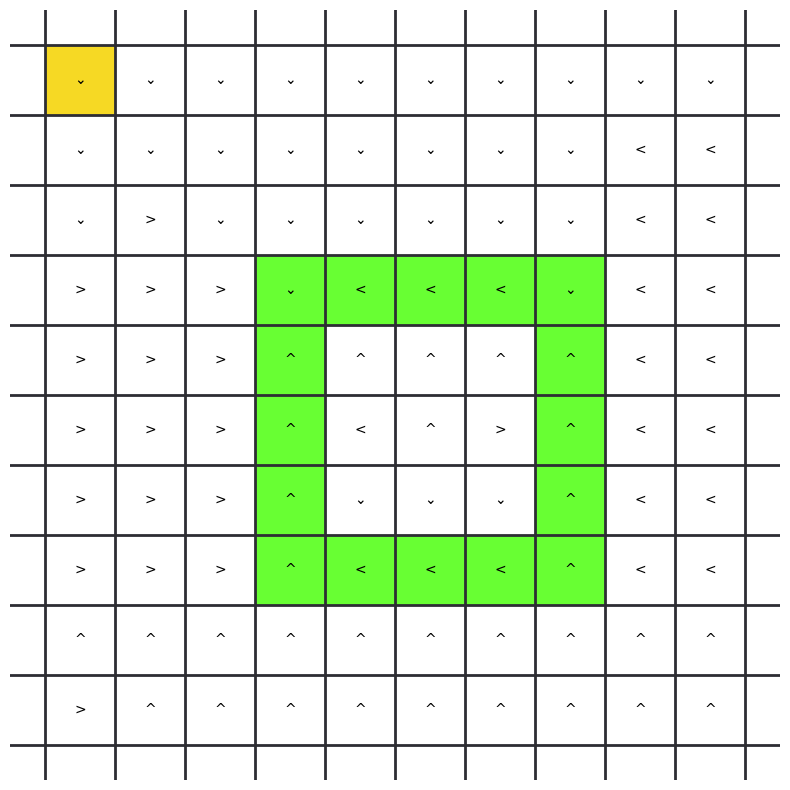

2024-05-12 15:19:10,035 [MainThread] [INFO]  La ejecución de POLICY_ITERATION acaba de terminar. 20 fueron necesarias para alcanzar convergencia
2024-05-12 15:19:10,035 [MainThread] [INFO]  Fin del entrenamiento. Calculando la política óptima a partir de las recompensas...


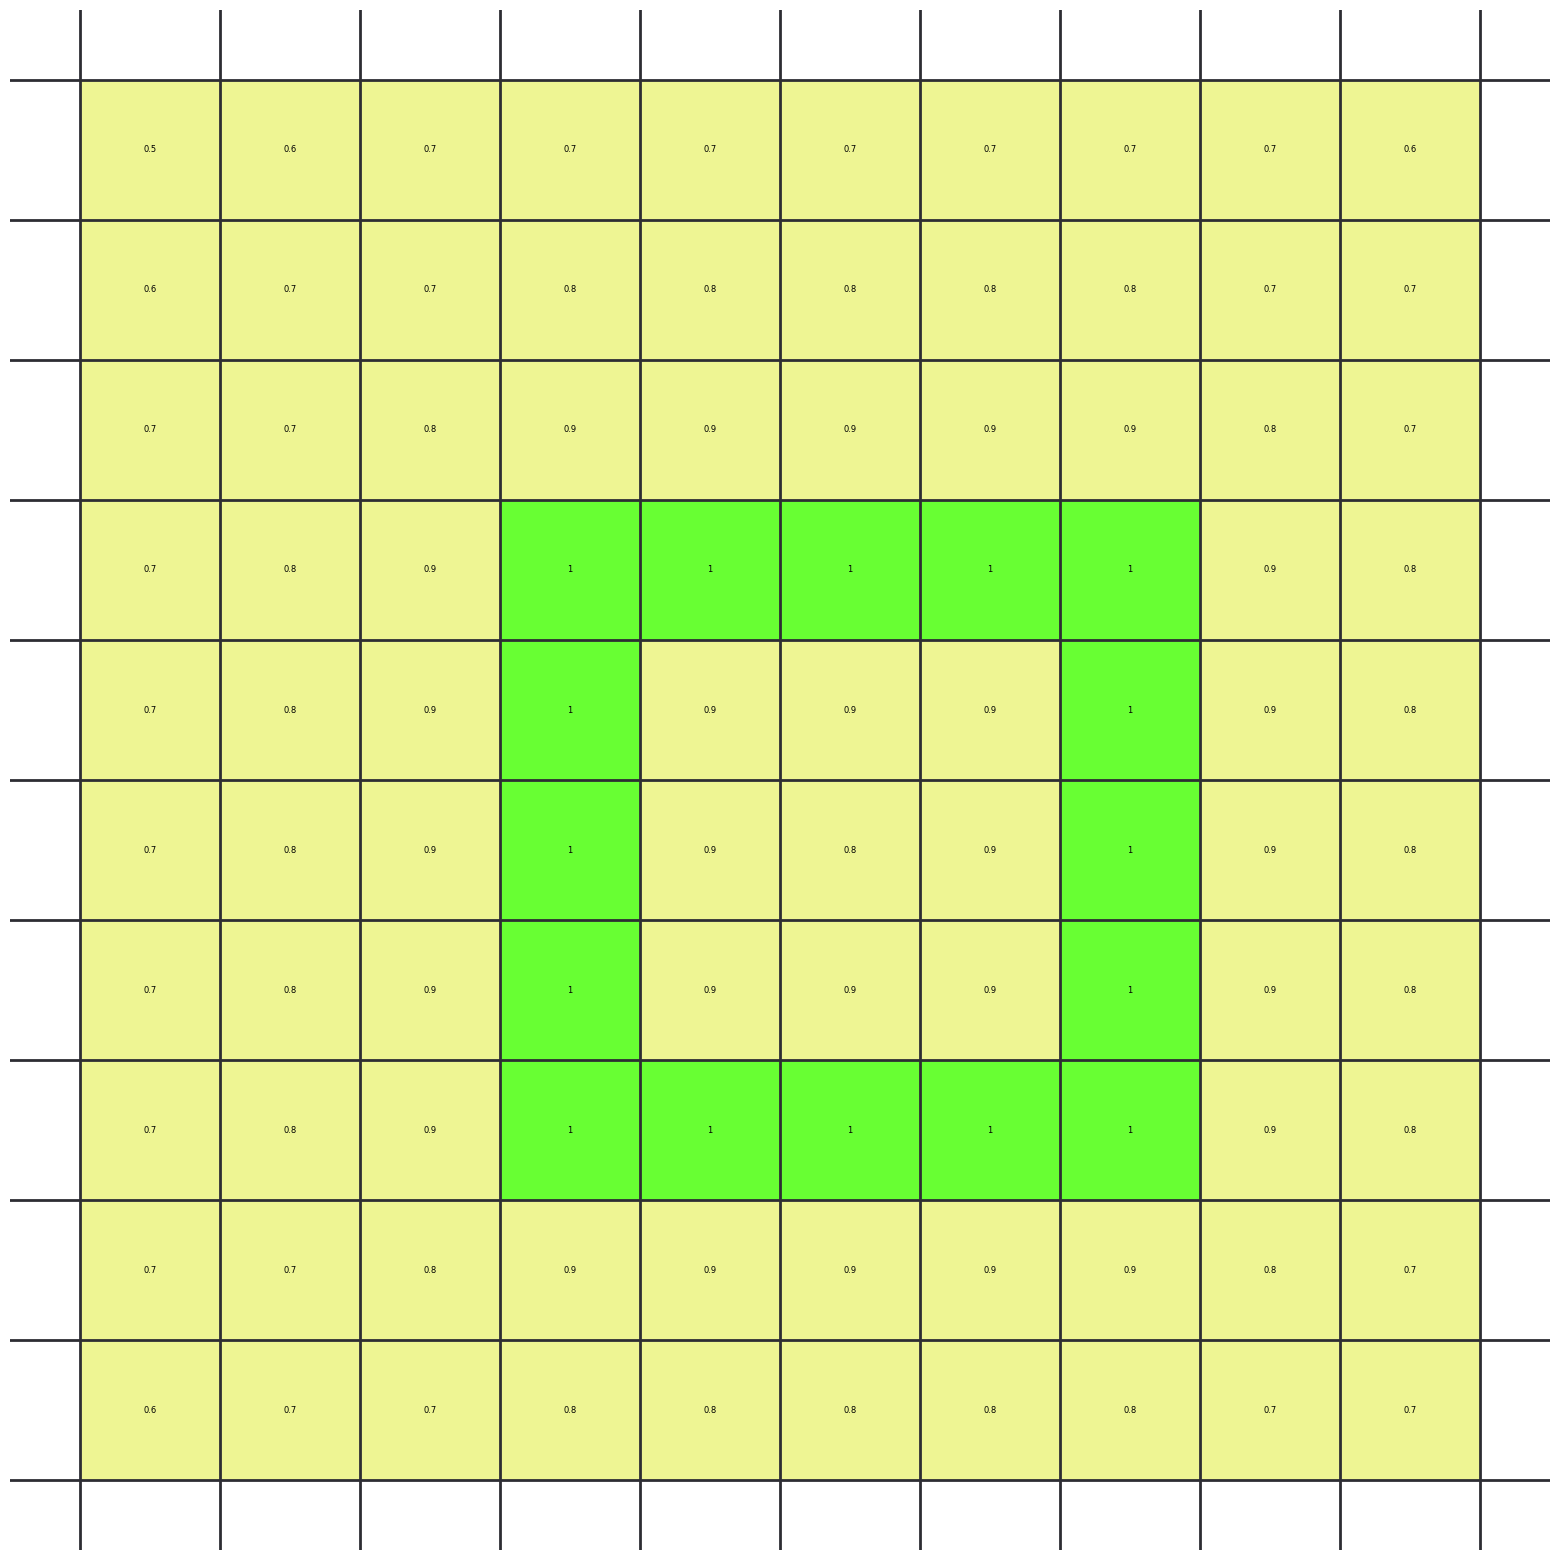

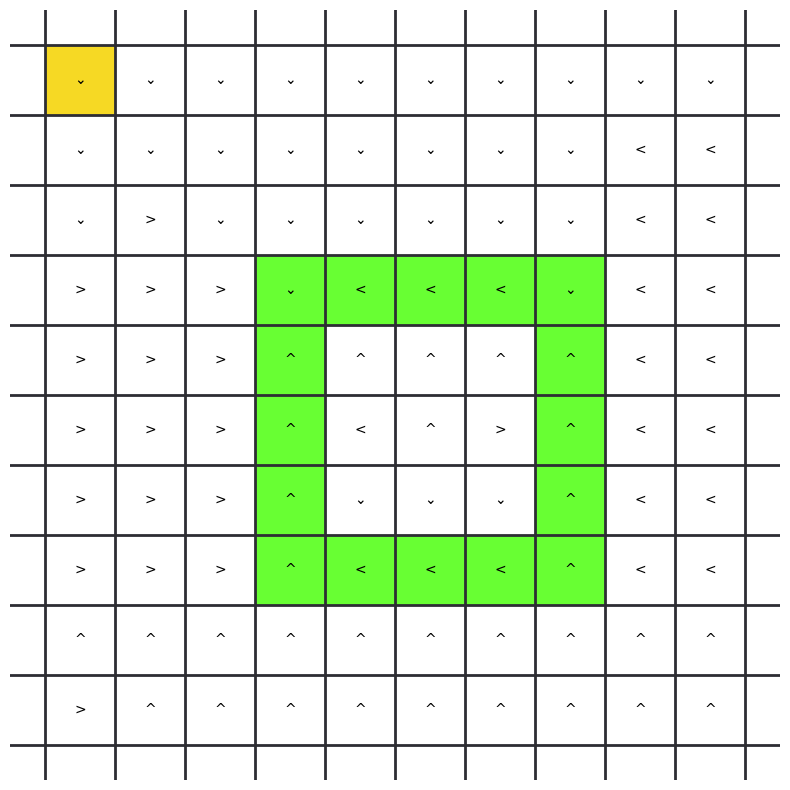

In [1]:
from drawing_singlePolicy import DrawingSinglePolicy
from algorithm import Algorithm
from canvas import Canvas

columns = 50
rows = 50

rewards_board = [[' ' for _ in range(columns)] for _ in range(rows)]

# Defino las recompensas de acuerdo a la figura que queremos dibujar.
for i in range(rows):
    for j in range(columns):
        if i == 10 and j >= 10 and j <= 40:
            rewards_board[i][j] = '+1'
        if i == 40 and j >= 10 and j <= 40:
            rewards_board[i][j] = '+1'
        if j == 40 and i >= 10 and i <= 40:
            rewards_board[i][j] = '+1'
        if j == 10 and i >= 10 and i <= 40:
            rewards_board[i][j] = '+1'

rewards_board[0][0] = 'S'

columns = 10
rows = 10

rewards_board = [[' ' for _ in range(columns)] for _ in range(rows)]

# Defino las recompensas de acuerdo a la figura que queremos dibujar.
for i in range(rows):
    for j in range(columns):
        if i == 3 and j >= 3 and j <= 7:
            rewards_board[i][j] = '+1'
        if i == 7 and j >= 3 and j <= 7:
            rewards_board[i][j] = '+1'
        if j == 7 and i >= 3 and i <= 7:
            rewards_board[i][j] = '+1'
        if j == 3 and i >= 3 and i <= 7:
            rewards_board[i][j] = '+1'

rewards_board[0][0] = 'S'

canvas = Canvas(rewards_board)
algorithm = DrawingSinglePolicy(algorithm_kind=Algorithm.POLICY_ITERATION).train(canvas, plot_policies=True)

# Visualización de los valores y de de la política
algorithm.canvas.plot_rainbow()
algorithm.canvas.plot_policy(algorithm.policy)


2024-05-06 19:28:06,692 [MainThread] [INFO]  Inicio del entrenamiento. Calculando la política óptima a partir de las recompensas...


rewards_board:  10


2024-05-06 19:28:06,991 [MainThread] [INFO]  Fin del entrenamiento. Calculando la política óptima a partir de las recompensas...


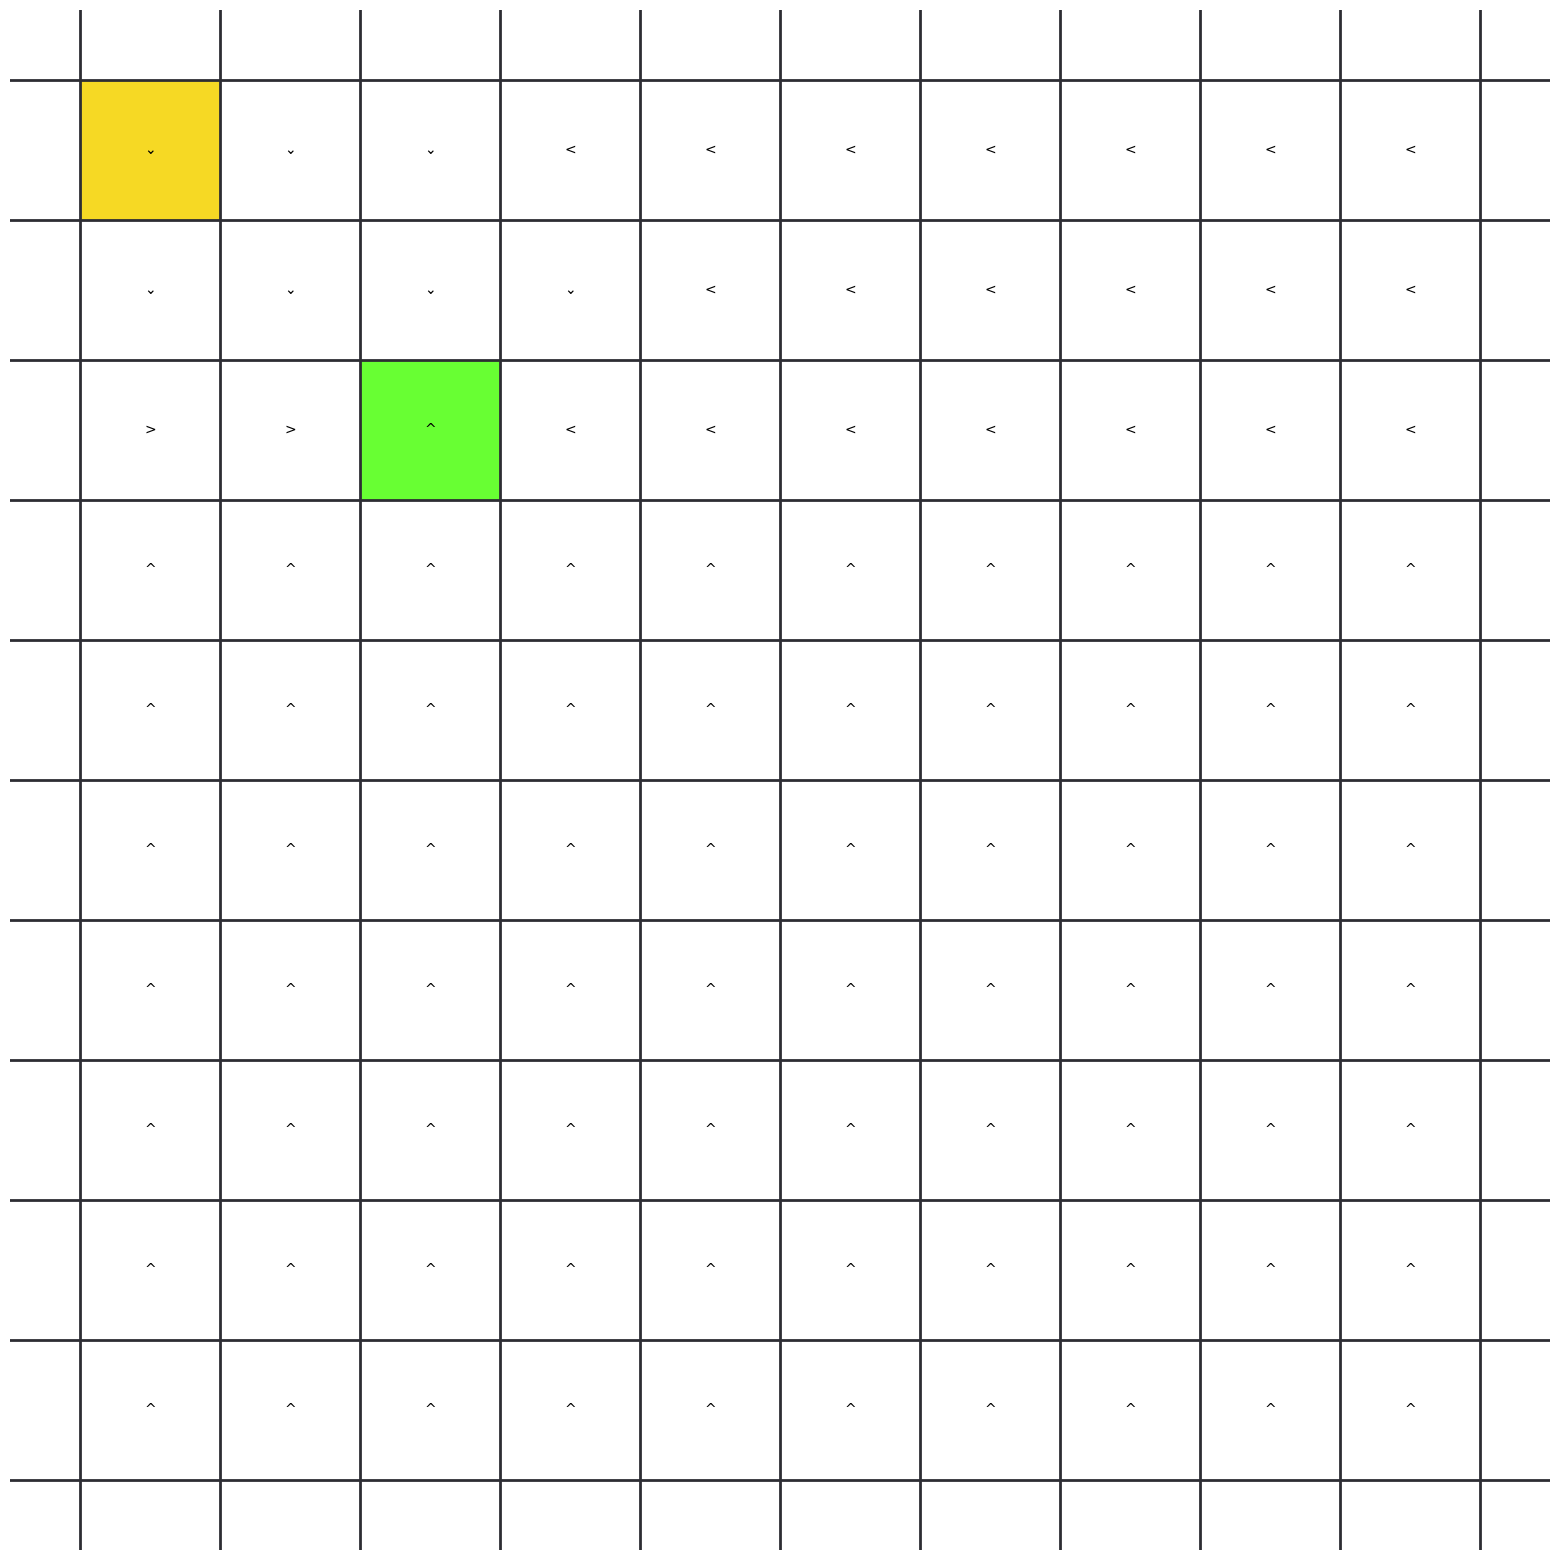

2024-05-06 19:28:07,178 [MainThread] [INFO]  Inicio del entrenamiento. Calculando la política óptima a partir de las recompensas...
2024-05-06 19:28:07,511 [MainThread] [INFO]  Fin del entrenamiento. Calculando la política óptima a partir de las recompensas...


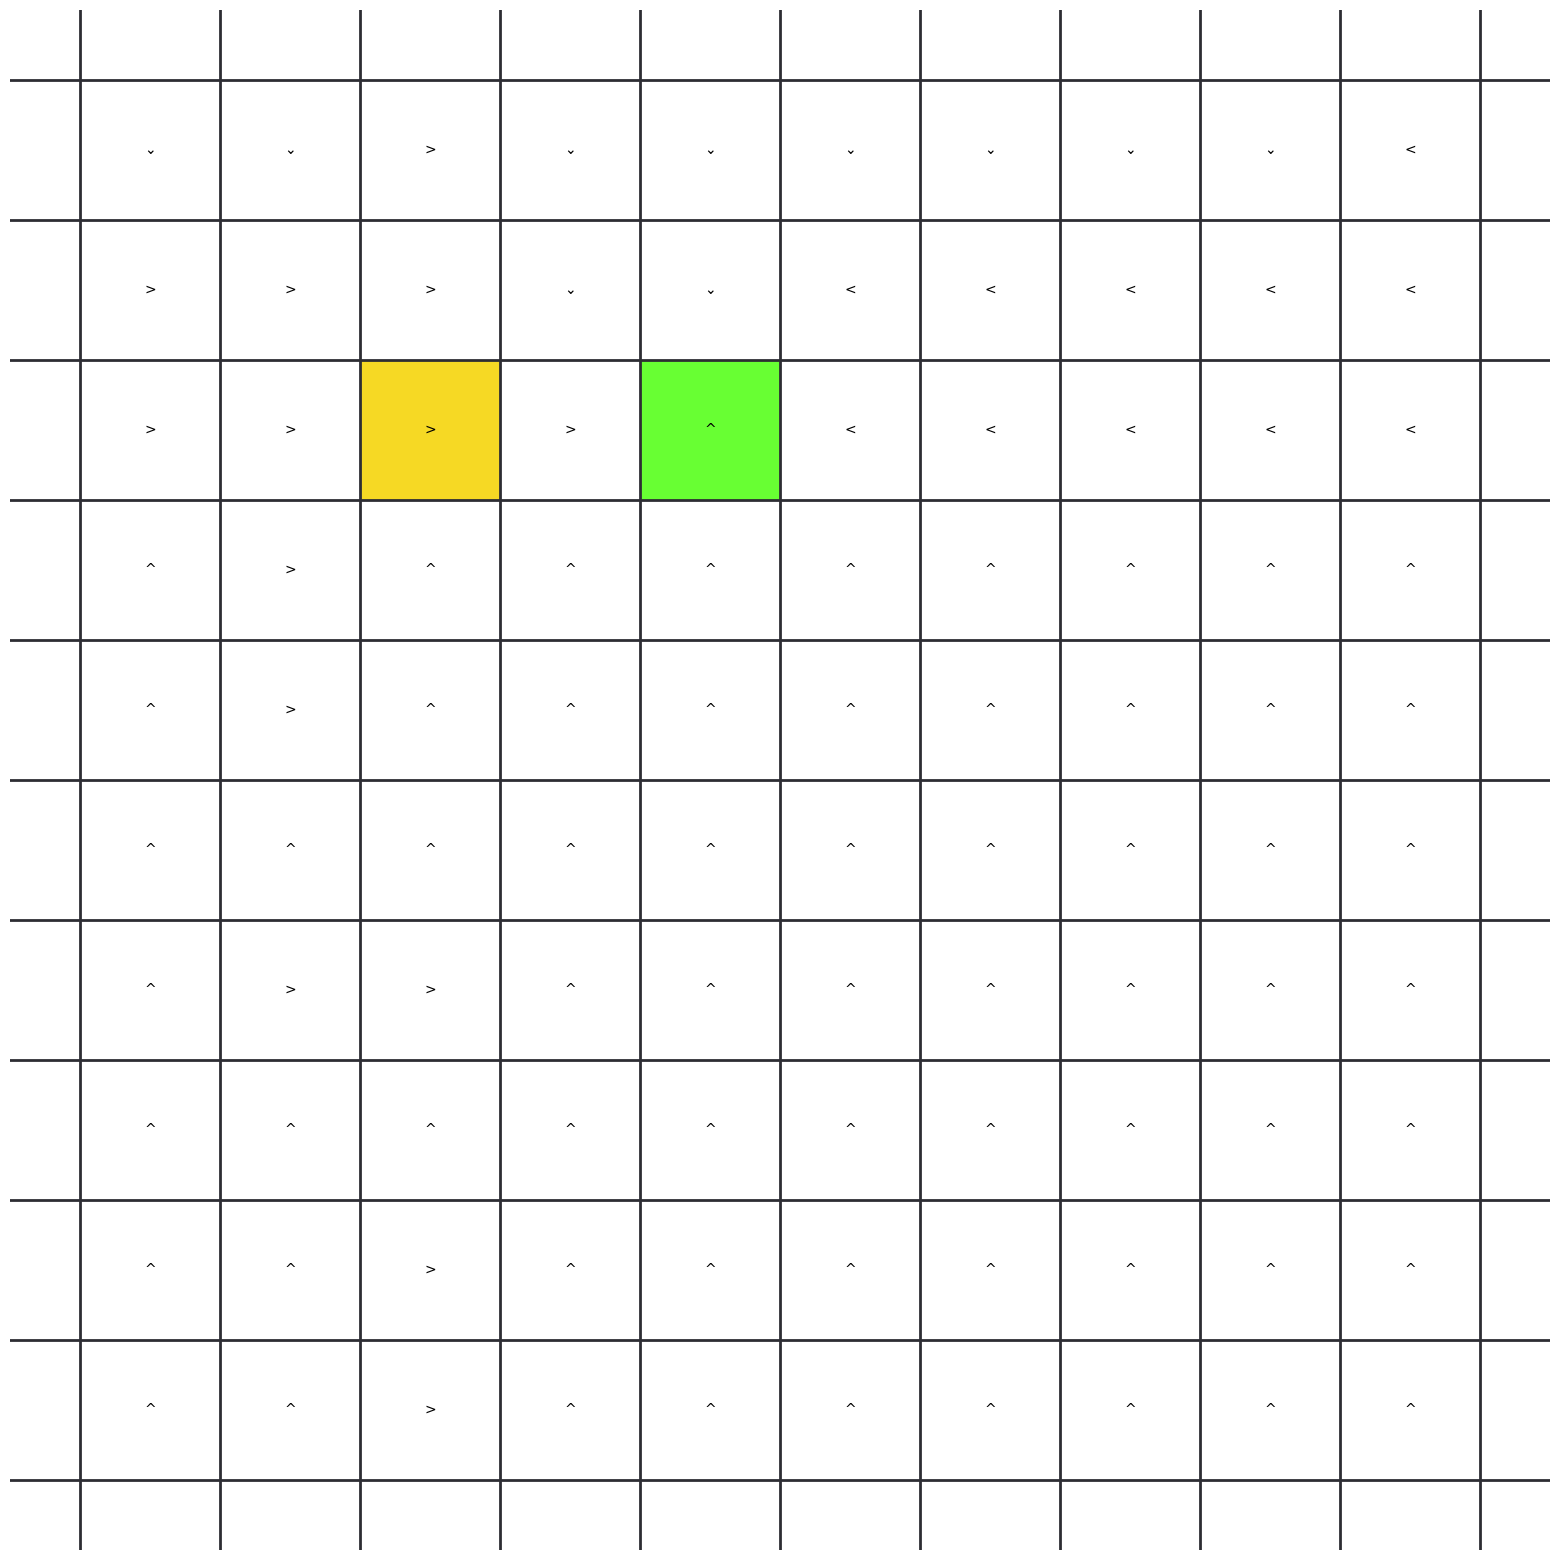

2024-05-06 19:28:07,682 [MainThread] [INFO]  Inicio del entrenamiento. Calculando la política óptima a partir de las recompensas...
2024-05-06 19:28:07,990 [MainThread] [INFO]  Fin del entrenamiento. Calculando la política óptima a partir de las recompensas...


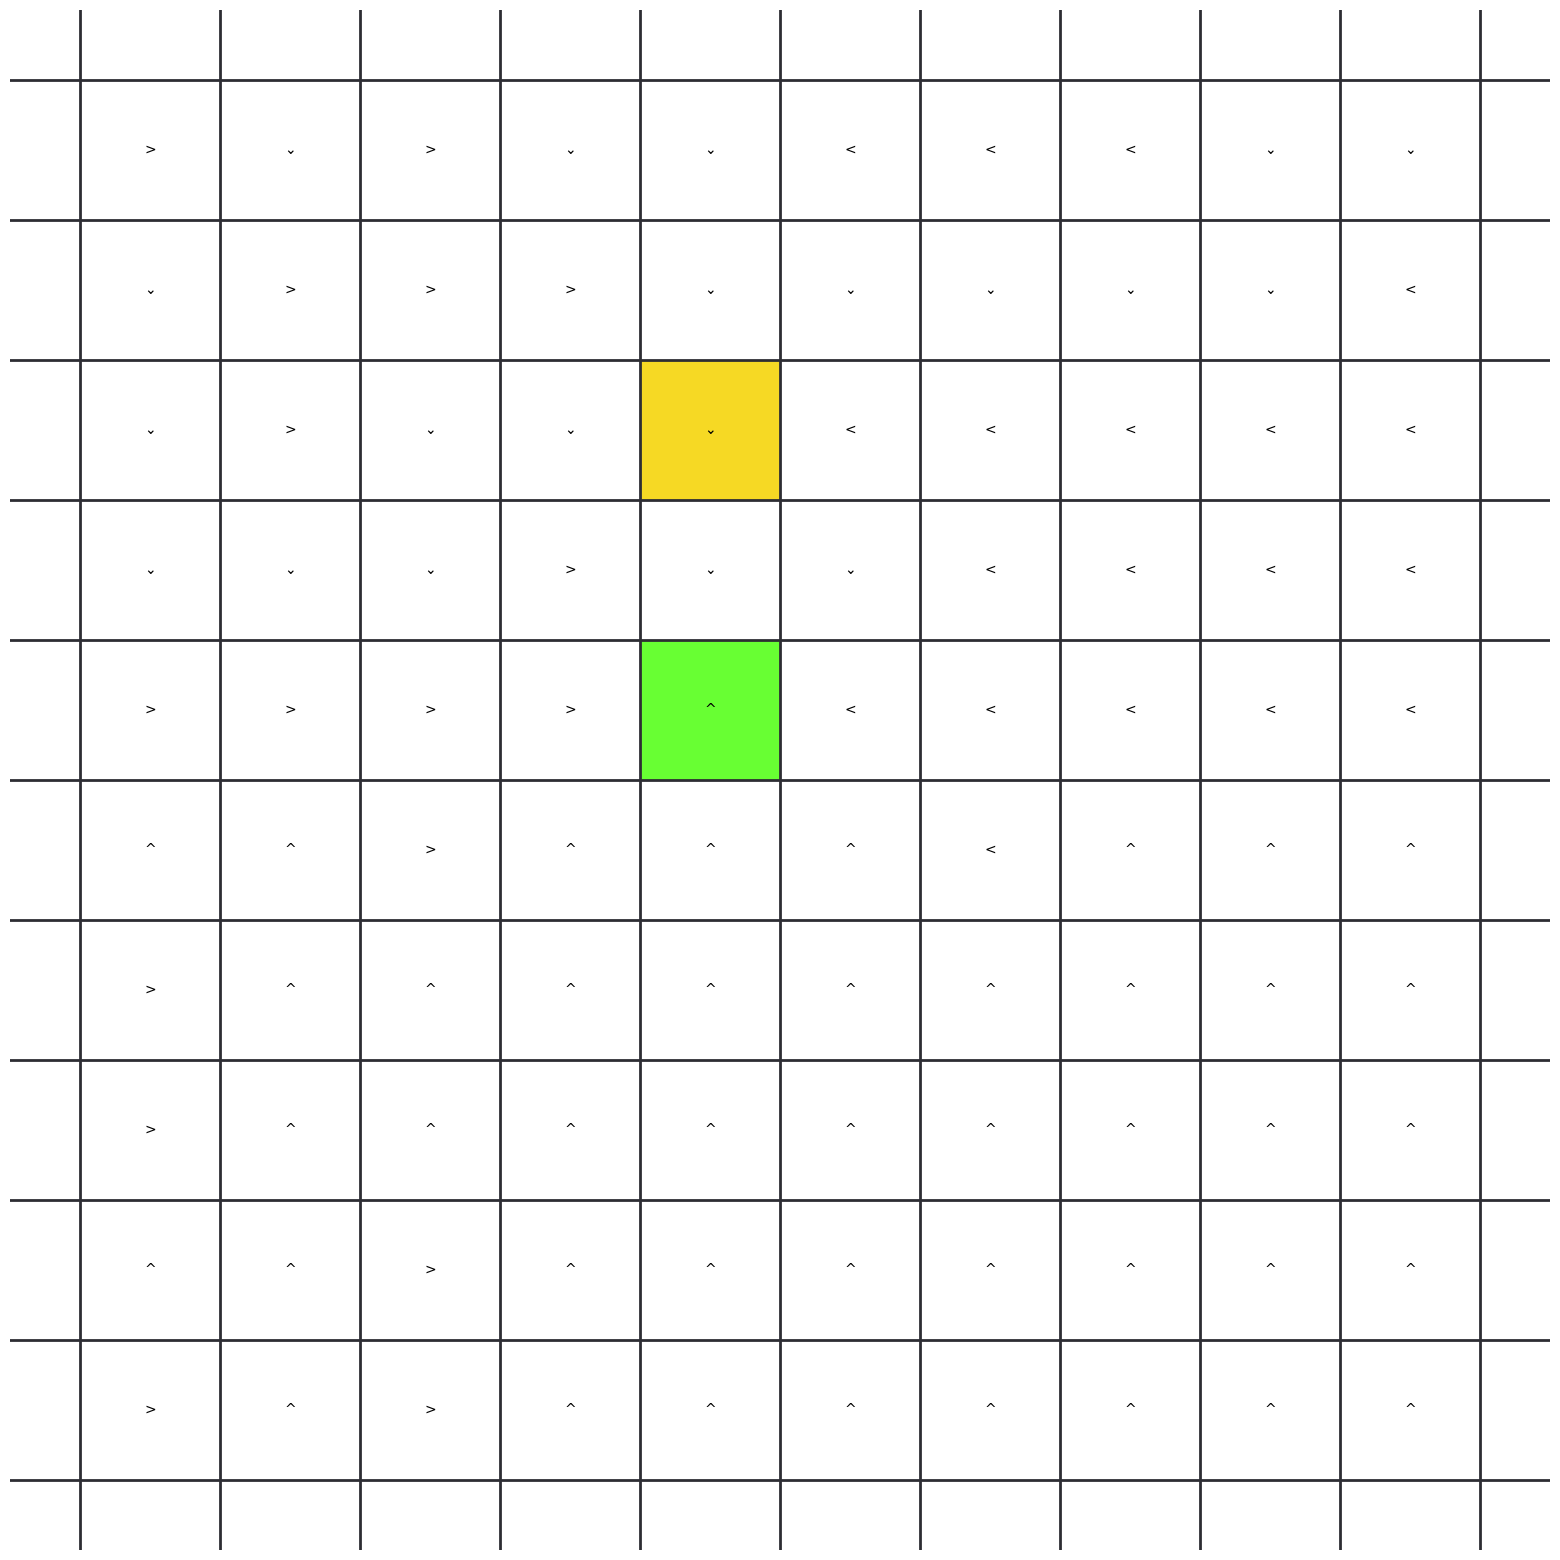

2024-05-06 19:28:08,168 [MainThread] [INFO]  Inicio del entrenamiento. Calculando la política óptima a partir de las recompensas...
2024-05-06 19:28:08,476 [MainThread] [INFO]  Fin del entrenamiento. Calculando la política óptima a partir de las recompensas...


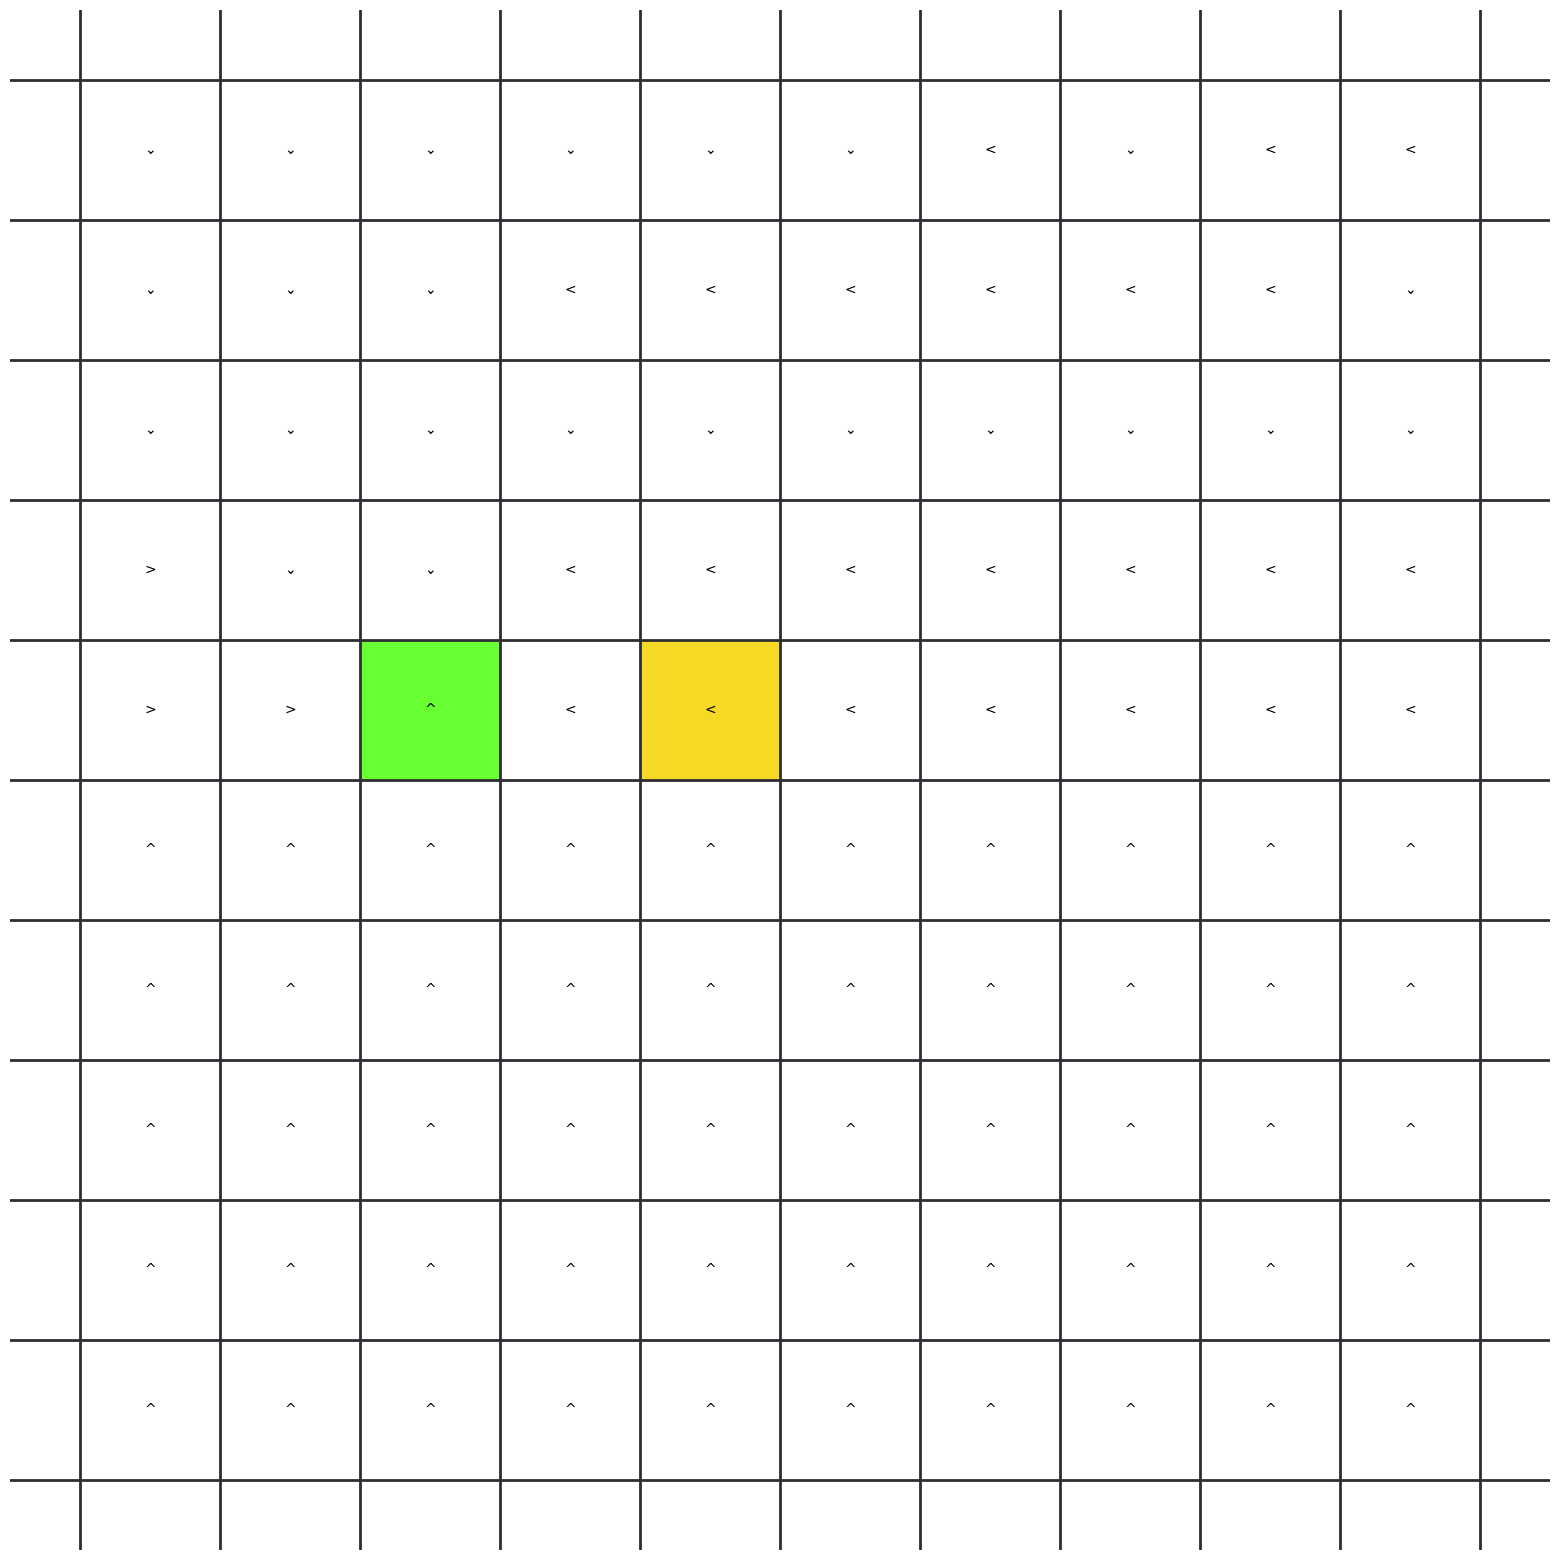

2024-05-06 19:28:08,651 [MainThread] [INFO]  Inicio del entrenamiento. Calculando la política óptima a partir de las recompensas...
2024-05-06 19:28:08,964 [MainThread] [INFO]  Fin del entrenamiento. Calculando la política óptima a partir de las recompensas...


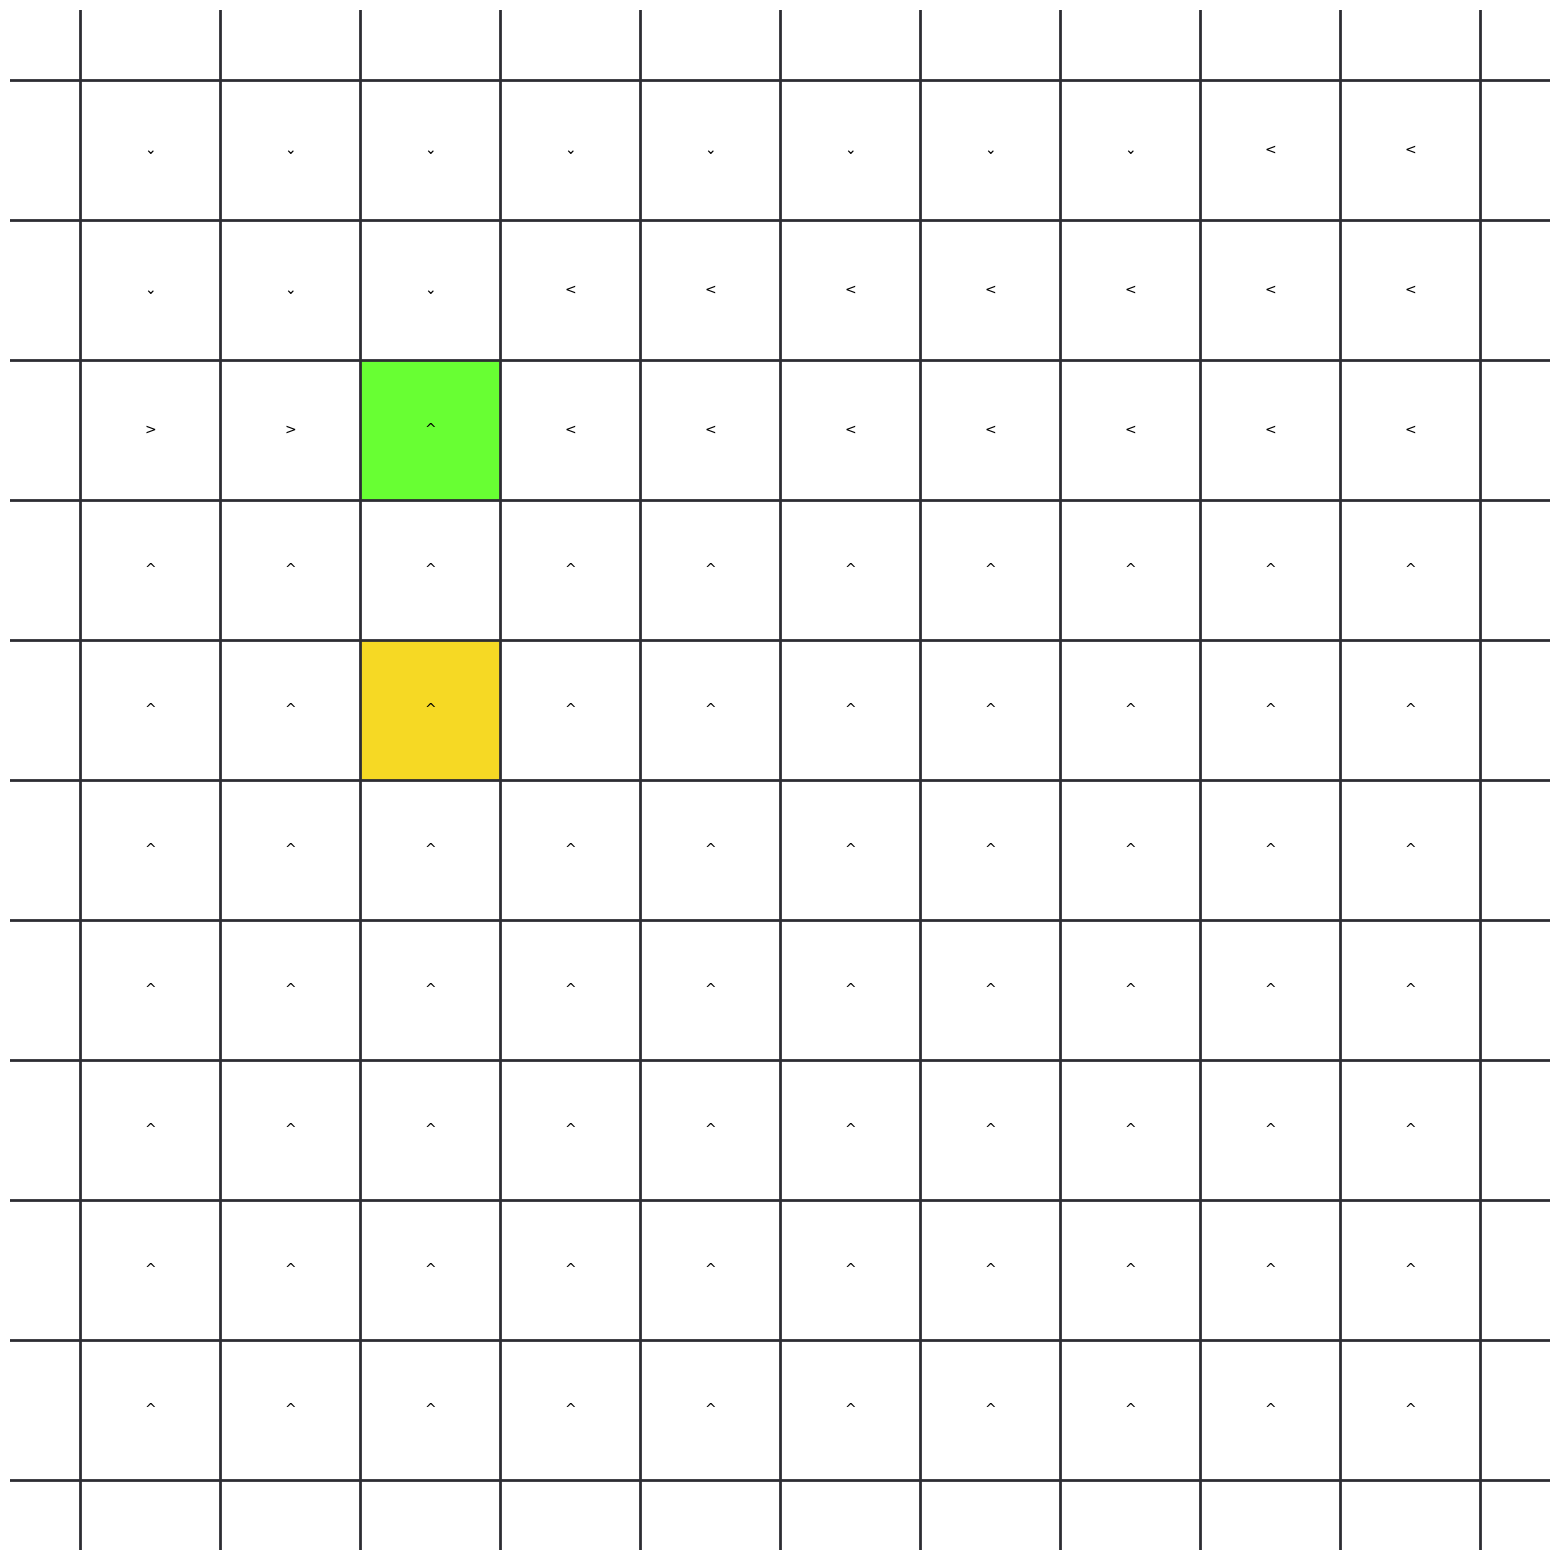

terminar


[(<canvas.Canvas at 0x11b859910>,
  (0, 0)),
 (<canvas.Canvas at 0x11b8d8690>,
  (2, 2)),
 (<canvas.Canvas at 0x11c0f4810>,
  (2, 4)),
 (<canvas.Canvas at 0x10b5d2fd0>,
  (4, 4)),
 (<canvas.Canvas at 0x11cd00310>,
  (4, 2))]

In [1]:
from drawing_multiplePolicies import DrawingMultiplePolicies
from determine_figure import determine_figure

figure_sequence, dimensions = determine_figure("square 10x10 centered")
DrawingMultiplePolicies(figure_sequence, dimensions, draw=False).create_canvases(plot=True)